In [2]:
import pandas as pd
from matplotlib import pyplot as plt

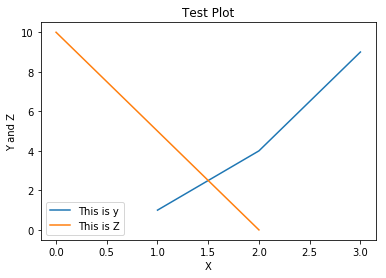

In [3]:
x = [1,2,3]
y = [1,4,9]
z = [10,5,0]
plt.plot(x,y,z)
plt.title('Test Plot')
plt.xlabel('X')
plt.ylabel('Y and Z')
plt.legend(['This is y', 'This is Z'])
plt.show()

In [4]:
sample_data = pd.read_csv('sample_data.csv')
print(sample_data)
type(sample_data.column_c)

   column_a  column_b  column_c
0         1         1        10
1         2         4         8
2         3         9         6
3         4        16         4
4         5        25         2


pandas.core.series.Series

In [5]:
data = pd.read_csv('test-copy1.csv')

In [6]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [7]:
data.keys() #to obtain the various column names in the dataset

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [8]:
#to check the type of data contain in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [9]:
##frequency distribution of the gender column
#value count is a series method and not a dataframe method.. You always index out a series
data['Occupation'].value_counts()

4     30778
0     29212
7     24994
1     20261
17    17375
20    14278
12    13269
14    11473
2     11408
16    10751
6      8747
3      7476
10     5374
5      5196
15     5191
11     5007
19     3458
13     3325
18     2745
9      2638
8       643
Name: Occupation, dtype: int64

In [10]:
##checking the number of null values in each column
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [11]:
data['Marital_Status'].value_counts()

0    137807
1     95792
Name: Marital_Status, dtype: int64

# Cleaning the dataset
simply put, data cleaning is making the columns within a database fit for the purpose you want to use it for. some of the columns we want to clean are:
occupation
marital status
product category 2
product category 3

In [12]:
data['Marital_Status'].replace([0,1], ['Single', 'Married'], inplace = True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,Married,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,Single,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,Married,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,Married,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,Single,4,5.0,12.0


In [13]:
data['Product_Category_3'].value_counts()

16.0    13833
15.0    11955
14.0     7855
5.0      7141
17.0     7116
8.0      5299
9.0      4953
12.0     3869
13.0     2390
6.0      1998
18.0     1992
4.0       816
11.0      780
10.0      775
3.0       265
Name: Product_Category_3, dtype: int64

In [14]:
# in dealing with null values
#you can decide to drop them 
#you can fill with the mean if they are numericals
#if they re categories, you fill with the mode
#data['Product_Category_3'].dropna()
gen_mode =  data['Product_Category_3'].mode()[0]
gen_mode2 =  data['Product_Category_2'].mode()[0]

In [15]:
data['Product_Category_2'].fillna(gen_mode, inplace = True)
data['Product_Category_3'].fillna(gen_mode2, inplace = True)

In [16]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [17]:
males = data[data['Gender'] == 'M']
females =data[data['Gender'] == 'F']
females

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
2,1000010,P00288442,F,36-45,1,B,4+,Married,5,14.0,8.0
3,1000010,P00145342,F,36-45,1,B,4+,Married,4,9.0,8.0
4,1000011,P00053842,F,26-35,1,C,1,Single,4,5.0,12.0
14,1000028,P00159542,F,26-35,1,C,2,Married,10,15.0,16.0
18,1000034,P00265242,F,18-25,0,A,0,Single,5,8.0,8.0
23,1000045,P00346442,F,46-50,16,A,1,Married,1,2.0,14.0
24,1000045,P00357242,F,46-50,16,A,1,Married,5,16.0,8.0
25,1000045,P00284742,F,46-50,16,A,1,Married,5,12.0,8.0
33,1000059,P00177442,F,51-55,1,B,4+,Married,1,6.0,8.0
34,1000062,P00119242,F,36-45,3,A,1,Single,18,16.0,8.0


In [18]:
# alternatively
#group_data = data.groupby(['Gender','Age'])
#female_g = group_data.get_group('F','18 - 25')
#male_g = group_data.get_group('M','18 - 25')
group_data = data.groupby(['Gender','Age'])

In [21]:
males['Marital_Status'].value_counts(normalize = True) * 100

Single     59.258016
Married    40.741984
Name: Marital_Status, dtype: float64

In [19]:
females['Marital_Status'].value_counts(normalize = True) * 100

Single     58.187352
Married    41.812648
Name: Marital_Status, dtype: float64

In [20]:
group_data['Marital_Status'].value_counts(normalize = True) * 100

Gender  Age    Marital_Status
F       0-17   Single            100.000000
        18-25  Single             74.499473
               Married            25.500527
        26-35  Single             59.599594
               Married            40.400406
        36-45  Single             61.697032
               Married            38.302968
        46-50  Married            76.595745
               Single             23.404255
        51-55  Married            63.512241
               Single             36.487759
        55+    Married            61.862836
               Single             38.137164
M       0-17   Single            100.000000
        18-25  Single             80.052741
               Married            19.947259
        26-35  Single             60.744251
               Married            39.255749
        36-45  Single             60.468304
               Married            39.531696
        46-50  Married            69.945122
               Single             30.054878
  

In [21]:
#five most popular products ids
data.Product_ID.value_counts().head()

P00265242    829
P00112142    717
P00025442    695
P00110742    680
P00046742    646
Name: Product_ID, dtype: int64

In [22]:
data.City_Category.value_counts()

B    98566
C    72509
A    62524
Name: City_Category, dtype: int64

In [23]:
married = data[data['Marital_Status'] == 'Married']

In [24]:
married

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,Married,1,11.0,8.0
2,1000010,P00288442,F,36-45,1,B,4+,Married,5,14.0,8.0
3,1000010,P00145342,F,36-45,1,B,4+,Married,4,9.0,8.0
5,1000013,P00350442,M,46-50,1,C,3,Married,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,Married,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,Married,2,4.0,9.0
10,1000026,P00046742,M,26-35,7,B,2,Married,1,2.0,15.0
11,1000026,P00040042,M,26-35,7,B,2,Married,5,16.0,8.0
12,1000026,P00196542,M,26-35,7,B,2,Married,5,8.0,14.0
13,1000026,P00004542,M,26-35,7,B,2,Married,5,8.0,8.0


In [25]:
married['Age'].value_counts()

26-35    36924
36-45    18322
46-50    14062
51-55    11770
18-25     9016
55+       5698
Name: Age, dtype: int64

In [26]:
single = data[data['Marital_Status'] == 'Single']
single.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
1,1000009,P00113442,M,26-35,17,C,0,Single,3,5.0,8.0
4,1000011,P00053842,F,26-35,1,C,1,Single,4,5.0,12.0
8,1000015,P00161842,M,26-35,7,A,1,Single,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,Single,5,14.0,8.0
15,1000029,P00111542,M,36-45,7,C,1,Single,2,17.0,8.0


In [27]:
mar_and_b = married[married['City_Category'] == 'B']

In [28]:
mar_b_male = mar_and_b[mar_and_b['Age'] == '26-35']

In [29]:
mar_b_male['Gender'].value_counts()

M    12138
F     3100
Name: Gender, dtype: int64

In [30]:
mar_b_male['Occupation'].value_counts()

0     2500
7     1541
12    1475
1     1376
4     1190
17    1017
14     990
2      950
20     832
5      737
15     582
6      574
16     512
3      483
11     278
19     117
9       84
Name: Occupation, dtype: int64

In [31]:

mar_b_male.drop('Gender', axis=1, inplace=True)
mar_b_male

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
10,1000026,P00046742,26-35,7,B,2,Married,1,2.0,15.0
11,1000026,P00040042,26-35,7,B,2,Married,5,16.0,8.0
12,1000026,P00196542,26-35,7,B,2,Married,5,8.0,14.0
13,1000026,P00004542,26-35,7,B,2,Married,5,8.0,8.0
26,1000048,P00110842,26-35,4,B,3,Married,1,2.0,5.0
27,1000048,P00251642,26-35,4,B,3,Married,1,2.0,4.0
104,1000173,P00100042,26-35,0,B,1,Married,6,10.0,8.0
105,1000173,P00348942,26-35,0,B,1,Married,8,13.0,8.0
106,1000173,P00309242,26-35,0,B,1,Married,5,8.0,8.0
107,1000173,P00029842,26-35,0,B,1,Married,8,16.0,8.0


In [32]:
mar_b_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15238 entries, 10 to 233596
Data columns (total 10 columns):
User_ID                       15238 non-null int64
Product_ID                    15238 non-null object
Age                           15238 non-null object
Occupation                    15238 non-null int64
City_Category                 15238 non-null object
Stay_In_Current_City_Years    15238 non-null object
Marital_Status                15238 non-null object
Product_Category_1            15238 non-null int64
Product_Category_2            15238 non-null float64
Product_Category_3            15238 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.3+ MB


In [33]:
import pandas as pd
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,Married,1,11.0,8.0
1,1000009,P00113442,M,26-35,17,C,0,Single,3,5.0,8.0
2,1000010,P00288442,F,36-45,1,B,4+,Married,5,14.0,8.0
3,1000010,P00145342,F,36-45,1,B,4+,Married,4,9.0,8.0
4,1000011,P00053842,F,26-35,1,C,1,Single,4,5.0,12.0


In [34]:
data.drop('Gender', axis=1, inplace=True)
data.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,46-50,7,B,2,Married,1,11.0,8.0
1,1000009,P00113442,26-35,17,C,0,Single,3,5.0,8.0
2,1000010,P00288442,36-45,1,B,4+,Married,5,14.0,8.0
3,1000010,P00145342,36-45,1,B,4+,Married,4,9.0,8.0
4,1000011,P00053842,26-35,1,C,1,Single,4,5.0,12.0


In [35]:
import pandas as pd
df = pd.read_csv('test-copy1.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [36]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN


In [38]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [39]:
df.shape

(233599, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [42]:
## exploratory data analysis
#count unique values
df.Marital_Status.value_counts(dropna = False)

0    137807
1     95792
Name: Marital_Status, dtype: int64

In [45]:
df.Gender.value_counts(dropna = False)

M    175772
F     57827
Name: Gender, dtype: int64

In [47]:
df['Gender'].value_counts(dropna = False)

M    175772
F     57827
Name: Gender, dtype: int64

In [48]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000
